In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

## neural network library
from keras.models import Sequential
from keras.layers import Dense, Dropout
from mlxtend.plotting import plot_confusion_matrix
import pickle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [45]:
ddf = pd.read_csv("diabetes.csv")
ddf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [46]:
ddf

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [47]:
ddf.isnull().sum()
# no null values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [48]:
cols_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
print((ddf[cols_with_zeros] == 0).sum())


Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


In [49]:
for col in cols_with_zeros:
    ddf[col] = ddf[col].replace(0, ddf[col].median())

In [60]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    float64 
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    int64   
 9   Glucose_bin               768 non-null    category
 10  Insulin_bin               768 non-null    category
 11  BMI_bin                   768 non-null    category
 12  Age_bin                   768 non-null    category
dtypes: category(4), float64(3), int64(6)
memory usage:

In [61]:
ddf.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


C:\Users\User\AppData\Local\Temp\ipykernel_14360\3536665399.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=ax[1, 0], data=ddf, x='Outcome', palette=['blue', 'lightgreen'])


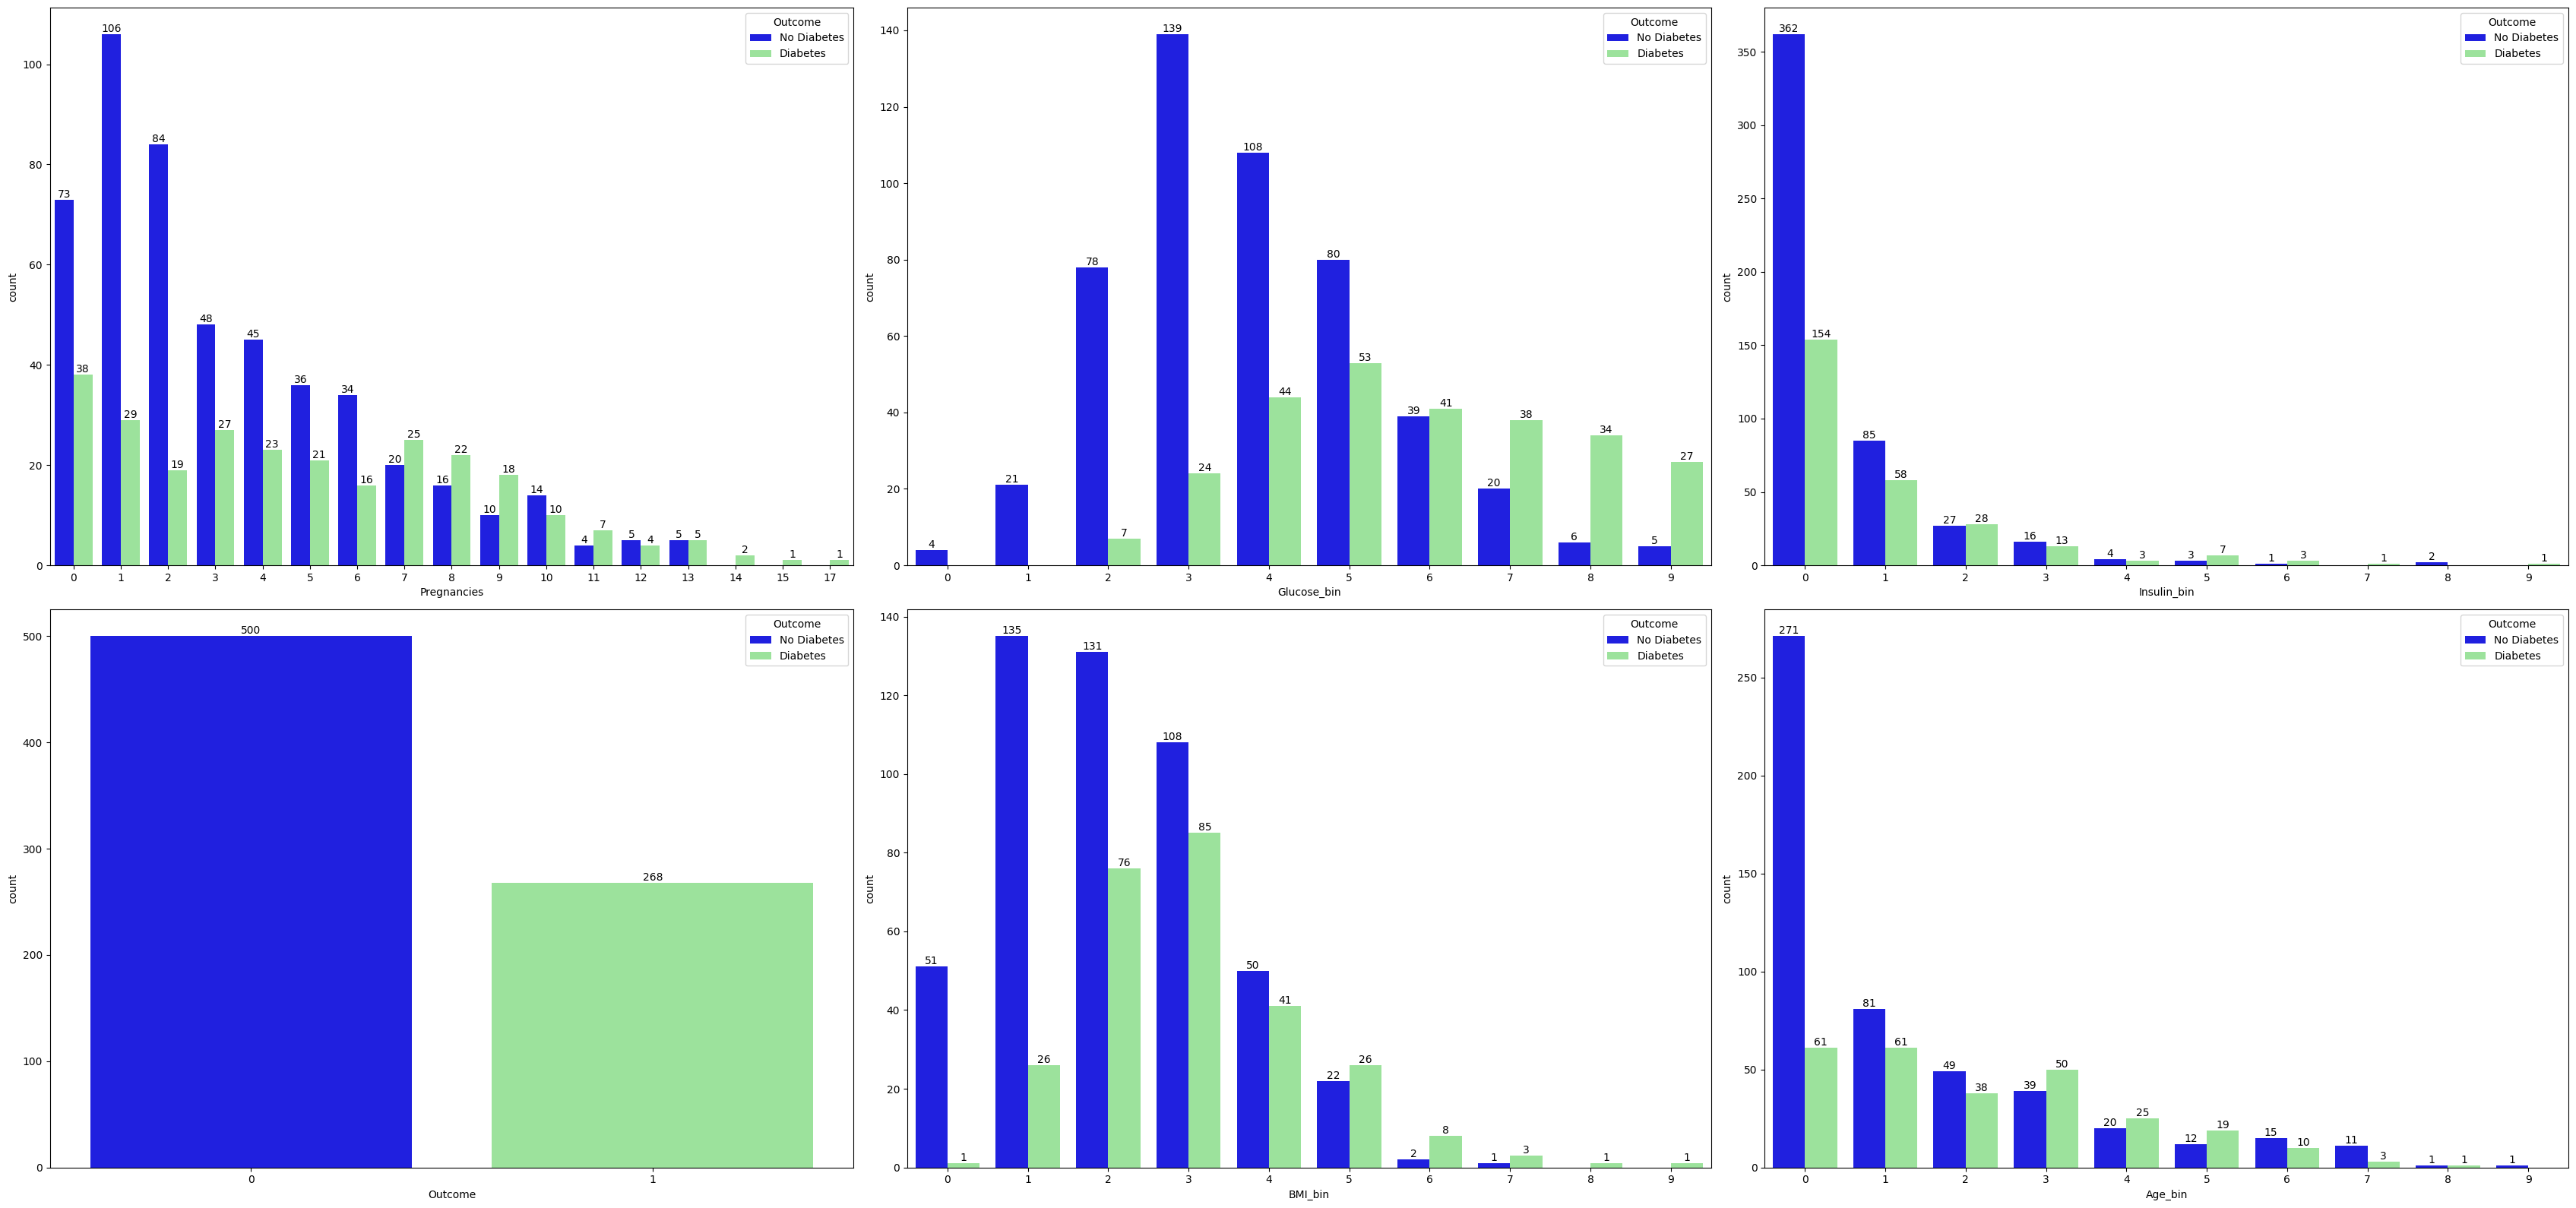

In [96]:
for col in ['Glucose', 'Insulin', 'BMI', 'Age']:
    ddf[f'{col}_bin'] = pd.cut(ddf[col], bins=10, labels=False)

    # Create subplots
fig, ax = plt.subplots(2, 3, figsize=(34, 16))

# Count plots
sns.countplot(ax=ax[0, 0], data=ddf, x='Pregnancies', hue='Outcome', palette=['blue', 'lightgreen'])
sns.countplot(ax=ax[0, 1], data=ddf, x='Glucose_bin', hue='Outcome', palette=['blue', 'lightgreen'])
sns.countplot(ax=ax[0, 2], data=ddf, x='Insulin_bin', hue='Outcome', palette=['blue', 'lightgreen'])
sns.countplot(ax=ax[1, 0], data=ddf, x='Outcome', palette=['blue', 'lightgreen'])
sns.countplot(ax=ax[1, 1], data=ddf, x='BMI_bin', hue='Outcome', palette=['blue', 'lightgreen'])
sns.countplot(ax=ax[1, 2], data=ddf, x='Age_bin', hue='Outcome', palette=['blue', 'lightgreen'])

# Add legends and bar labels
for ax_i in ax.flat:
    ax_i.legend(title='Outcome', labels=['No Diabetes', 'Diabetes'])
    for container in ax_i.containers:
        ax_i.bar_label(container)

plt.tight_layout()
plt.show()

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.128213       0.208615       0.032568   
Glucose                      0.128213  1.000000       0.218937       0.172143   
BloodPressure                0.208615  0.218937       1.000000       0.147809   
SkinThickness                0.032568  0.172143       0.147809       1.000000   
Insulin                     -0.055697  0.357573      -0.028721       0.238188   
BMI                          0.021546  0.231400       0.281132       0.546951   
DiabetesPedigreeFunction    -0.033523  0.137327      -0.002378       0.142977   
Age                          0.544341  0.266909       0.324915       0.054514   
Outcome                      0.221898  0.492782       0.165723       0.189065   
Glucose_bin                  0.126466  0.989196       0.213133       0.161797   
Insulin_bin                 -0.032556  0.375616      -0.007152       0.230198   
BMI_bin                     

<Axes: >

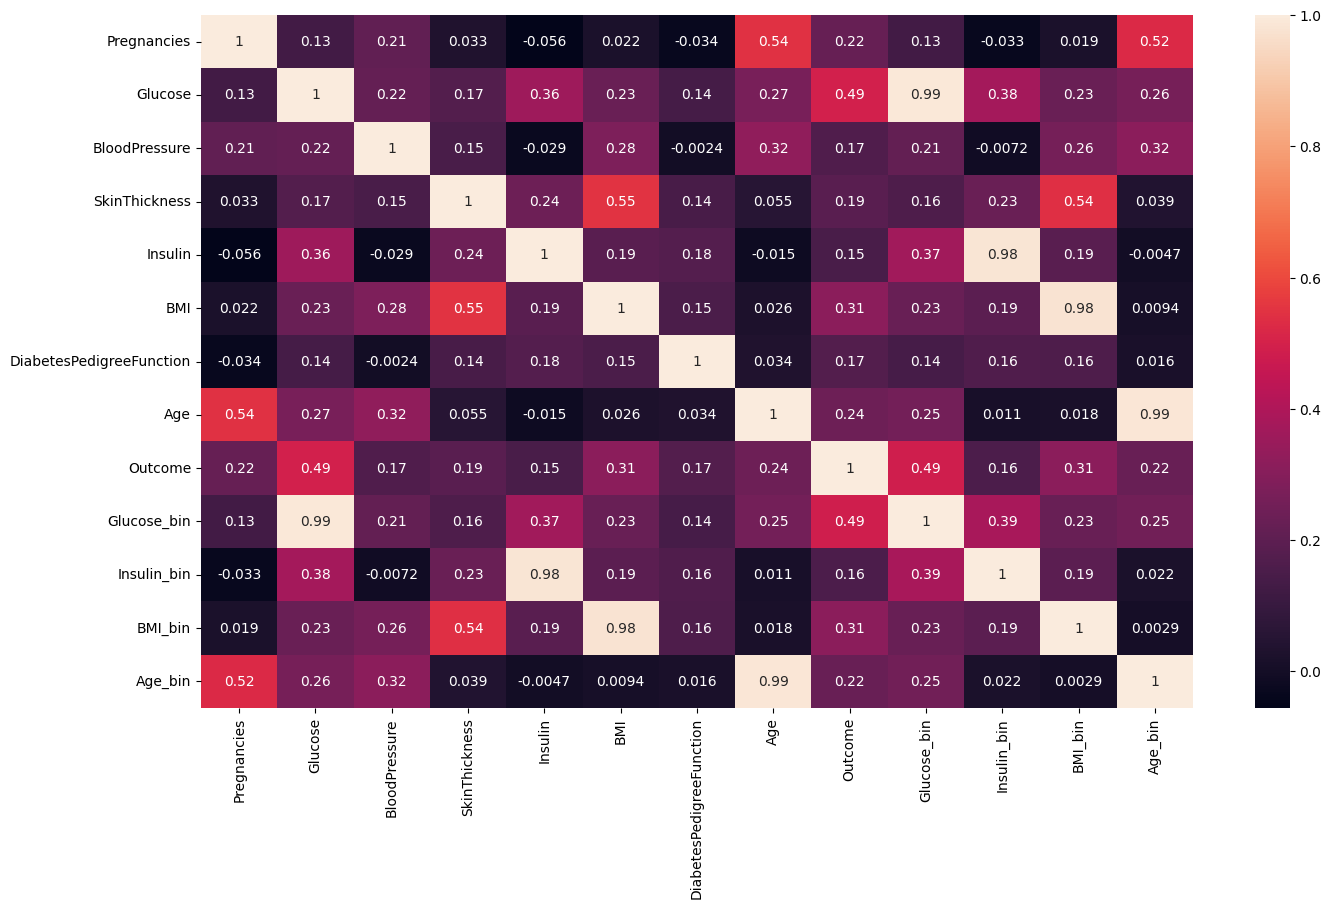

In [143]:
corr_metrix = ddf.corr()
print(corr_metrix)
fig, ax=plt.subplots(figsize=(16,9))
sns.heatmap(corr_metrix, annot=True, square=False, color='blue')

In [84]:
X = ddf.drop("Outcome", axis=1)
y = ddf["Outcome"]

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [98]:
X_train.shape

(614, 12)

In [88]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(12,)),  # <-- Match to X_train.shape[1]
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [91]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.1, verbose=0)

In [115]:
val_accuracy = np.mean(history.history['val_accuracy'])
print(f"\nval_accuracy is: {val_accuracy * 100:.2f}%")



val_accuracy is: 71.23%


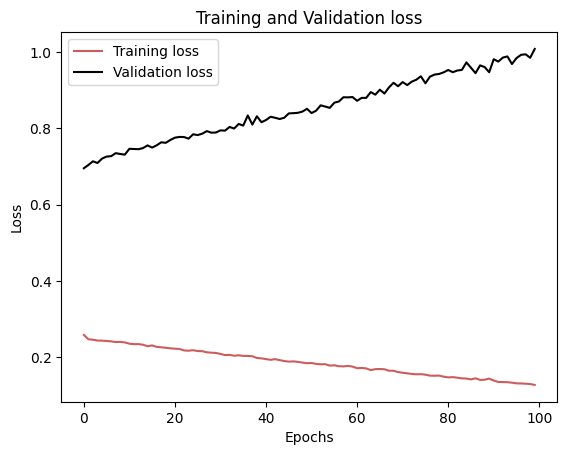

In [116]:
history_ddf = pd.DataFrame(history.history)

plt.plot(history_ddf.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_ddf.loc[:, ['val_loss']],"#000000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

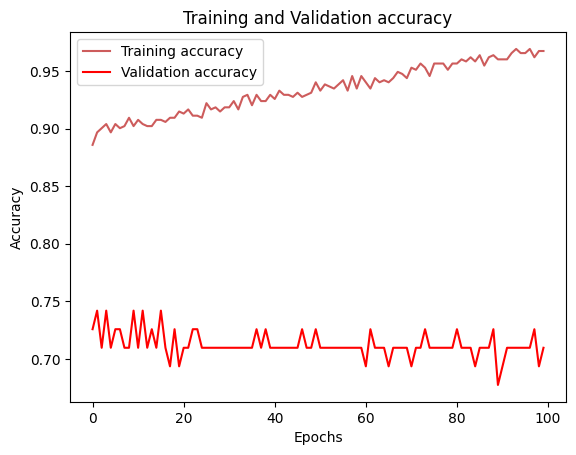

In [112]:
history_ddf = pd.DataFrame(history.history)

plt.plot(history_ddf.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
plt.plot(history_ddf.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [109]:
y_pred_prob = model.predict(X_test).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [100]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6558441558441559


In [139]:
accuracy = 0.6558441558441559

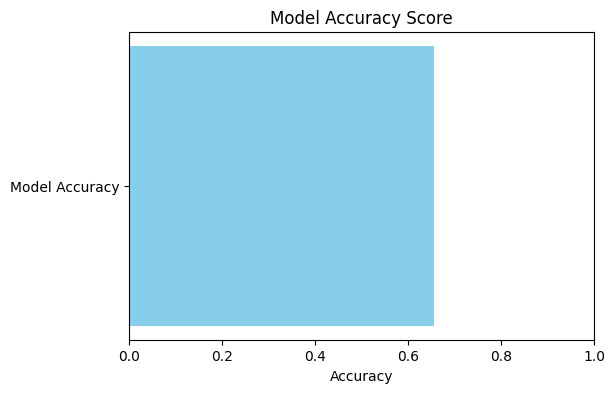

In [144]:
plt.figure(figsize=(6, 4))
plt.barh(['Model Accuracy'], [accuracy], color='skyblue')
plt.xlim(0, 1) 
plt.xlabel('Accuracy')
plt.title('Model Accuracy Score')

plt.show()

In [101]:
print("ROC AUC:", roc_auc_score(y_test, y_pred_prob))

ROC AUC: 0.7329660238751147


In [129]:
fpr, tpr = roc_curve(y_test, y_pred_prob)[0:2]

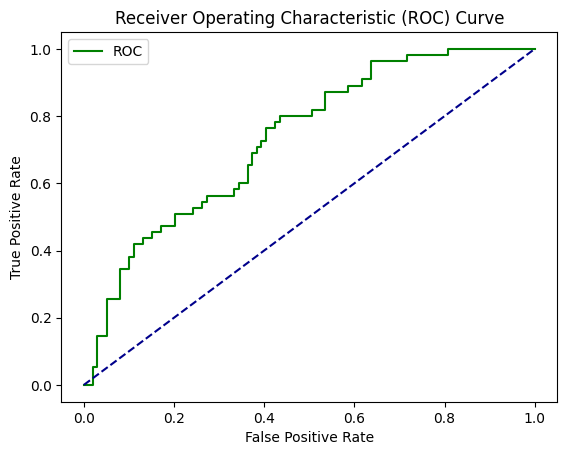

In [130]:

plt.plot(fpr, tpr, color='green', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

In [102]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.71      0.73        99
           1       0.52      0.56      0.54        55

    accuracy                           0.66       154
   macro avg       0.63      0.64      0.63       154
weighted avg       0.66      0.66      0.66       154



In [135]:
data = {
    'precision': [0.74, 0.52, 0.66, 0.63, 0.66],
    'recall': [0.71, 0.56, 0.66, 0.64, 0.66],
    'f1-score': [0.73, 0.54, 0.66, 0.63, 0.66],
    'support': [99, 55, 154, 154, 154]
}

# Class labels
labels = ['0', '1', 'accuracy', 'macro avg', 'weighted avg']

# Create DataFrame
df = pd.DataFrame(data, index=labels)

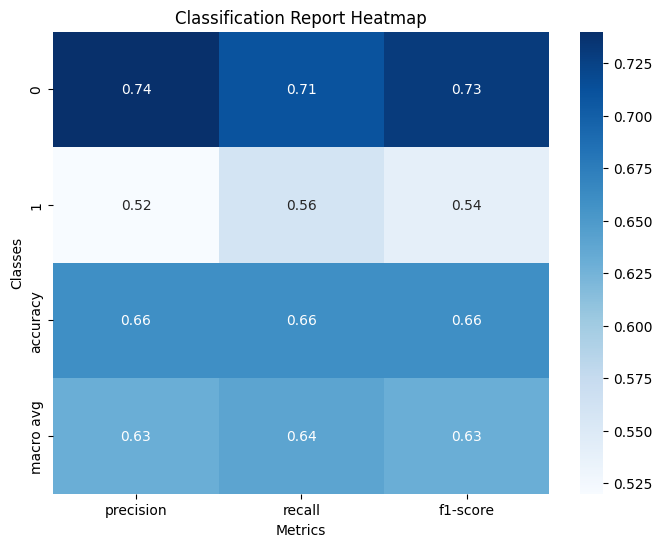

In [136]:
plt.figure(figsize=(8, 6))

# Create the heatmap
sns.heatmap(df.iloc[:-1, :-1], annot=True, cmap='Blues', fmt='.2f', cbar=True)

# Set plot labels and title
plt.title('Classification Report Heatmap')
plt.xlabel('Metrics')
plt.ylabel('Classes')

# Display the plot
plt.show()

In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[70 29]
 [24 31]]


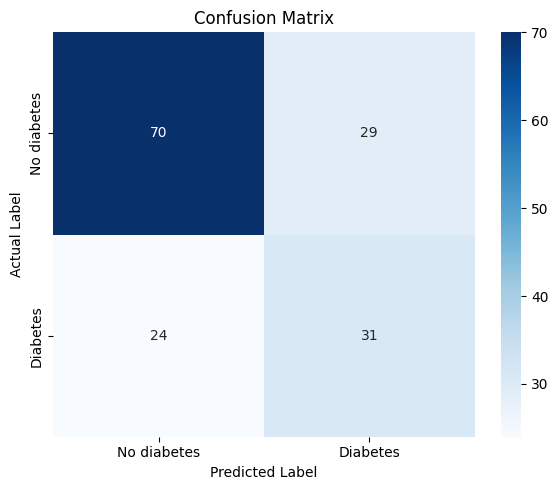

In [120]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5), dpi=100)
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_xticklabels(['No diabetes', 'Diabetes'])
ax.set_yticklabels(['No diabetes', 'Diabetes'])
ax.set_title('Confusion Matrix')
plt.tight_layout()
plt.show()